In [1]:
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../processed.csv")
df.dropna(subset=["Initial_Price"],inplace=True)

In [3]:
df.reindex(['Initial_Price', 'Final_Price', 'Required_Age', 'Win_Flag', 'Mac_Flag',
       'Linux_Flag', 'Positive_Reviews', 'Negative_Reviews',
       'Memory_MB', 'Storage_MB', 'target'],axis=1)

# positive,mixed,negative
# 1,0,-1

,Initial_Price,Final_Price,Required_Age,Win_Flag,Mac_Flag,Linux_Flag,Positive_Reviews,Negative_Reviews,Memory_MB,Storage_MB,target
0,52.0,52.0,NaN,True,True,False,57.0,7.0,1024,50,1
1,0.0,0.0,NaN,True,True,False,53.0,6.0,2048,3072,1
2,0.0,0.0,NaN,True,False,False,133.0,69.0,2048,100,0
3,530.0,530.0,NaN,True,False,False,22.0,9.0,2048,500,0
4,229.0,229.0,NaN,True,True,True,226.0,44.0,2048,1500,1
...,...,...,...,...,...,...,...,...,...,...,...
57467,85.0,85.0,NaN,True,False,False,0.0,4.0,4096,200,-1
57468,349.0,349.0,NaN,True,True,False,2.0,1.0,1024,1024,1
57469,164.0,164.0,NaN,True,False,False,8.0,1.0,4096,20480,1
57470,610.0,610.0,NaN,True,False,False,1.0,0.0,4096,3072,1


In [4]:
y = df["target"]
X = df.drop(labels=["target"],axis=1)


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=100,shuffle=True)


In [5]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [6]:
preds = dt.predict(X_test)
accuracy_score(y_test,preds)

0.896077190762417

In [7]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          -1       0.78      0.78      0.78      2123
           0       0.79      0.80      0.79      3563
           1       0.94      0.94      0.94     13280

    accuracy                           0.90     18966
   macro avg       0.84      0.84      0.84     18966
weighted avg       0.90      0.90      0.90     18966



In [8]:
confusion_matrix(y_test, preds)

array([[ 1666,   233,   224],
       [  220,  2837,   506],
       [  261,   527, 12492]], dtype=int64)

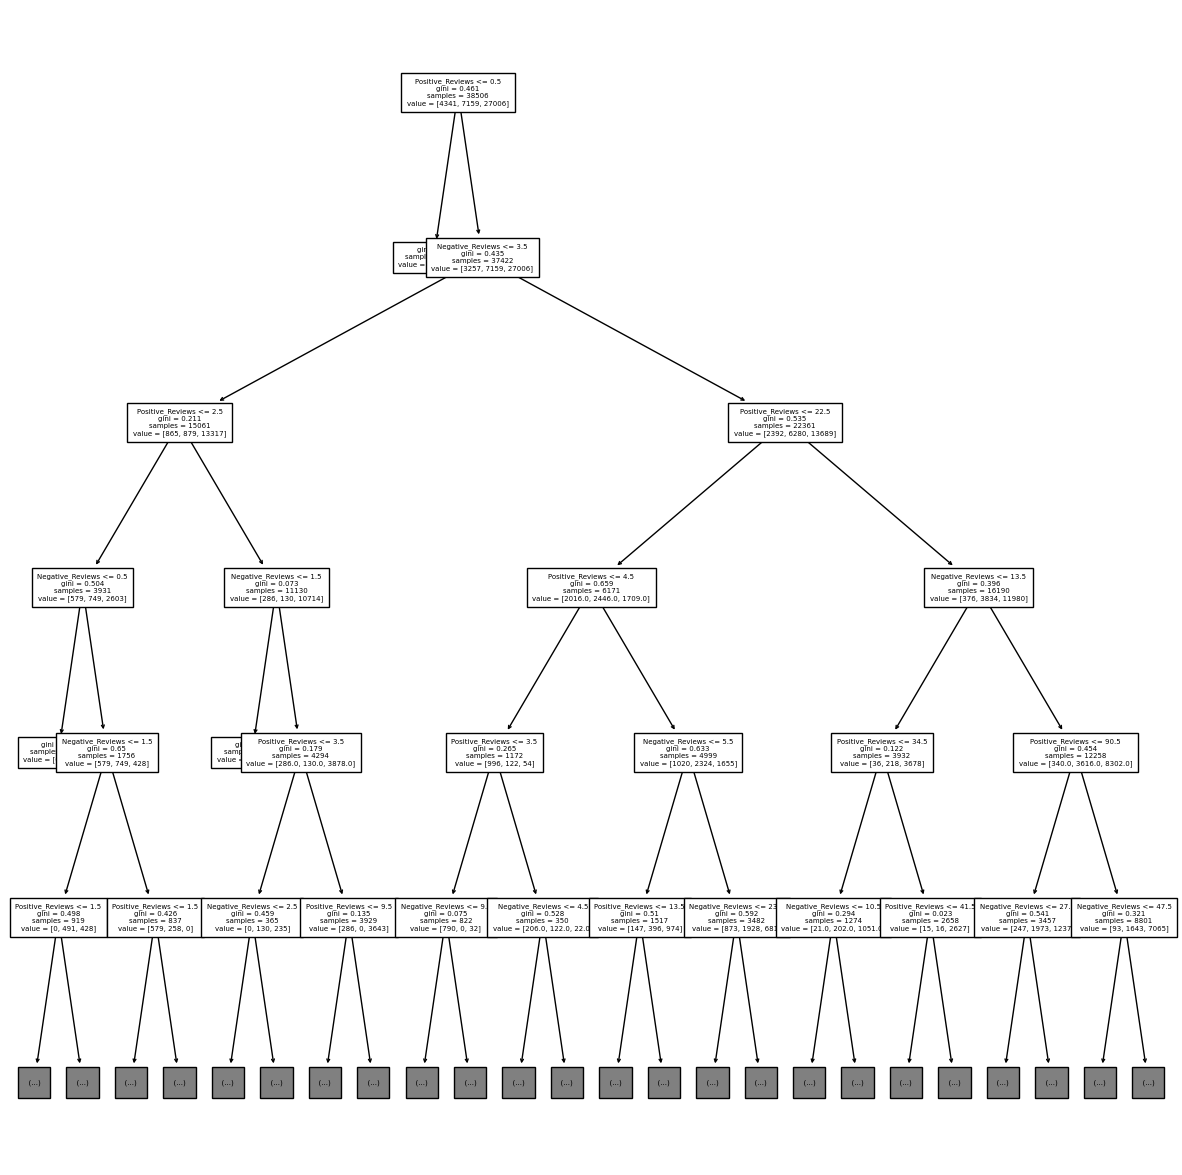

In [9]:
fig=tree.plot_tree(dt,max_depth=5, feature_names=dt.feature_names_in_, 
                   fontsize=5)[0].figure
fig.set_size_inches(15, 15)

In [10]:
dt.get_n_leaves()

3228

In [11]:
dt.get_depth()

34

### Conclusion
1. Decision Tree fitting got accuracy of 89% on test data which is more than KNN or bayes